# Author Identification
#### Carl Moser, Matthew Beaudouin-Lafon

We did stuff to do things with doodas.

In [35]:
from thinkbayes2 import Suite
from pickle import load
import thinkplot

def getPickle(fileName):
    infile = open(fileName + '.dat', 'rb+')
    chain = load(infile)
    wordCount = load(infile)
    author = load(infile)
    infile.close()
    return (chain, wordCount, author)

def isWorthChecking(prevWord, word):
    worth = True
    for author, prob in authorId.Items():
        chain = authorId.markovChains[author][0]
        worth = worth and (bool(chain.get(prevWord)) and bool(chain[prevWord].get(word)))# and (chain[prevWord][word]/float(wordCount[prevWord]) > 1e-4)
    
    if not worth :# and word == 'unpack':
        print(chain[prevWord].get(word))
        
    return worth

class AuthorId(Suite):
    """
    
    """
    def __init__(self):
        self.markovChains = {}
        Suite.__init__(self)
                
    def Likelihood(self, data, hypo):
        """
        data: (string, string)
        hypo: (Markov Chain, Word Count dictionary, Author)
        """
        hypoAuthor = hypo
        chain, wordCount = self.markovChains[hypoAuthor]
        prevWord, word = data
        
        if (chain.get(prevWord) and chain[prevWord].get(word)):
            like = chain[prevWord][word]/float(wordCount[prevWord])
        else:      
            like = -1 # If isWorthChecking fails, this will throw an error
            
        print(hypoAuthor, '      ', like)
        return like

In [36]:
files = [ 'GreatExpectations', 'MobyDick', 'RomeoAndJuliet']

authorId = AuthorId()

for f in files:
    chain, wordCount, author = getPickle(f)
    authorId[author] = 1
    authorId.markovChains[author] = (chain, wordCount)

In [37]:
f = open('testText.dat', 'rb')
testText = load(f)
f.close()

In [38]:
for author, prob in authorId.Items():
    authorId[author] = 1
    
authorId.Normalize()
maryV = []
charlesV = []
shakeV = []
totalWords = 0
for sentence in testText:
    sentence = ['*'] + sentence
    for i in range(len(sentence) - 1):
        totalWords += 1
        if isWorthChecking(sentence[i], sentence[i + 1]):
            authorId.Update((sentence[i], sentence[i + 1]))

        maryV.append(authorId['Mary Shelley'])
        charlesV.append(authorId['Charles Dickens'])
        shakeV.append(authorId['Shakespeare'])

Charles Dickens        0.017167381974248927
Herman Melville        0.005179359294072511
Shakespeare        0.0011940298507462687
Charles Dickens        0.3567318757192175
Herman Melville        0.06867671691792294
Shakespeare        0.09022556390977443
None
Charles Dickens        0.14084507042253522
Herman Melville        0.1276595744680851
Shakespeare        0.25
None


KeyError: 'brush'

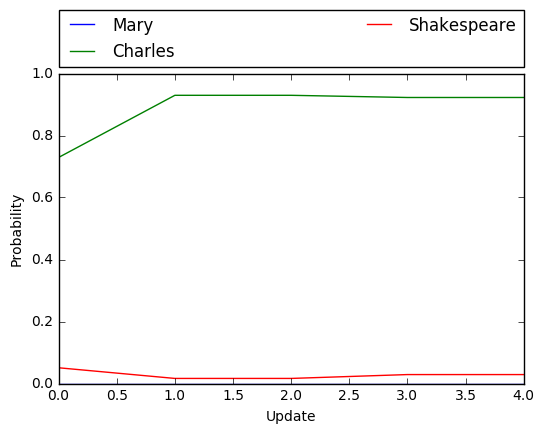

In [39]:
import matplotlib.pyplot as plt

#for i in (shakeV):
#    print(str(i) + ', ')
x = range(0, len(maryV))
plt.xlabel('Update')
plt.ylabel('Probability')
plt.plot(x, maryV, label='Mary')
plt.plot(x, charlesV, label='Charles')
plt.plot(x, shakeV, label='Shakespeare')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
# for fuck, shit in zip(maryV, charlesV):
#     print(fuck, shit)
# authorId

Questions:
    - What to do with words that aren't there?
    - "To" appears a lot more than other words. Should it be weighed differently?
    - Integrate sentence lengths